In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import os
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
def ADF_Cal(x):
    result = adfuller(x)
    print("ADF Statistic: %f" %result[0])
    print("p-value: %f" %result[1])
    print("Used lags: %f" %result[2])
    print("Critical Values:")
    for key, value in result[4].items():
        print('\t%s: %3f' % (key,value))

In [6]:
# 1
# Equation for autocorrelation
# k = number of lags. t = number of samples

In [7]:
# 2
y = [3,9,27,81,243]
# Calculate mannually the t0,t1 etc t5. k = 5
# In appendix

In [8]:
# 3
# Create a white noise graph with mean = 0 and standard devation = 1 with N = 1000
# sd * (np.random.randn(# of samples) + mean)


s = 1
u = 0
N = 1000

X = s * np.random.randn(N) + u

In [9]:
# 4
# Write a python code to calculate the autocorrelation function

def auto_corr(data,lags):
    # convert input data into a numpy array
    data = np.array(data)
    # acf will store the autocorreltion coefficent at each lag interval
    # the first datapoint is always 1.0 since anything correlated with itsself is = 1
    acf = [1.0]
    # calculate the mean for the entire dataset
    y_bar = data.mean()
    print("The mean of this dataset is: ",y_bar)
    # subtract the mean from each observation
    yy_bar = data - y_bar
    # clacualte the total variance for the data set
    total_variance = sum(np.square(yy_bar))
    print("The total variance for this dataset is: ", total_variance)
    # perform a forloop over the dataset with the desired number of lags
    # range is 1,lags b/c the first iteration calcualtes T1
    for i in range(1,lags):
        # first nparray is removing the last element each iteration
        yy_bar_bottom = yy_bar[:-i]
        # second nparray removes the first element each interation
        yy_bar_top = yy_bar[i:]
        # take the sum of of the product of each nparray each iteration
        yy = sum(yy_bar_top * yy_bar_bottom)
        # divide the sum by total variance and append to resulting acf list
        acf.append(yy/total_variance)
    return acf
    

In [10]:
# 4a
# Plot the ACF  for the white noise data using the stem command
wn_acf = auto_corr(X,len(X))

The mean of this dataset is:  -0.009004060786070906
The total variance for this dataset is:  1023.1244036099025


In [53]:
def acf_plot(y):
    y_rev = y[::-1]
    y_rev.extend(y[1:])
    print(len(y_rev))
    return y_rev
    

In [54]:
g = acf_plot(wn_acf)

1999


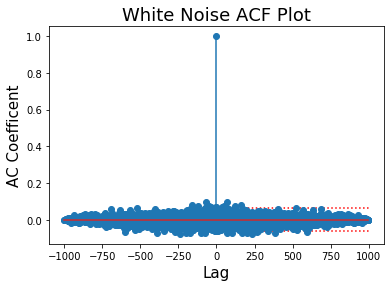

In [56]:
# Graph white noise ACF
x = np.array(list(range(-1000,999)))
figure = plt.stem(x,g,use_line_collection=True)
#plt.figure(figsize=(20,20))
plt.xlabel('Lag', fontsize=15)
# Incorporate 95% ACF white noise threshold
# +-2/ squareroot of T(1000) = 0.0632
plt.hlines(0.063245,0,1000,"r",linestyles="dotted")
plt.hlines(-0.063245,0,1000,"r",linestyles="dotted")
plt.ylabel('AC Coefficent', fontsize=15)
plt.title('White Noise ACF Plot',fontsize=18)
plt.show()

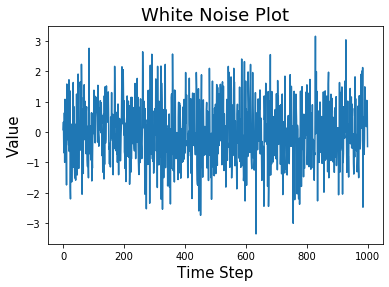

In [25]:
# 4b
# Graph white noise vs time-step and histogram
figure = plt.plot(X)
#plt.figure(figsize=(20,10))
plt.xlabel('Time Step', fontsize=15)
plt.ylabel('Value', fontsize=15)
plt.title('White Noise Plot',fontsize=18)
plt.show()

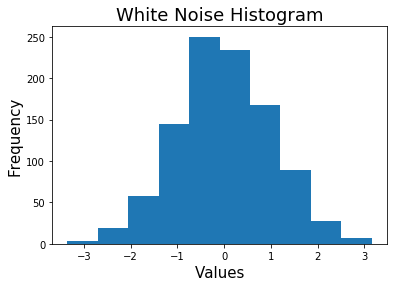

In [26]:
# 4b
# Graph white noise vs time-step and histogram
figure = plt.hist(X)
#plt.figure(figsize=(20,10))
plt.xlabel('Values', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('White Noise Histogram',fontsize=18)
plt.show()

In [27]:
#4c
# Write down observations
# ACF demonstrates the data is not autocorrelated since the entire dataset seems to be centered around 0 Autocorrelation
# The Histogram demonstrates that the data is normally distributed which means the data is likely to be stationary
# The Time plot demonstrates that there is no obvious signs of trend, seasonality, nor cyclic behavior
# This also provided evidence that the data is possibley stationary.

In [28]:
# 5
# load the tute1.csv dataset
os.listdir()
df = pd.read_csv("tute1.csv")
#plt.title("Scatter Plot of " + str(x) + " and " + str(y) + " with r = {}".format(r))

In [57]:
sales_acf = auto_corr(df.Sales,20)
adf_sales = ADF_Cal(df.Sales)

The mean of this dataset is:  948.737
The total variance for this dataset is:  955695.7331000001
ADF Statistic: -3.262755
p-value: 0.016628
Used lags: 9.000000
Critical Values:
	1%: -3.505190
	5%: -2.894232
	10%: -2.584210


In [75]:
s_acf_plt = acf_plot(sales_acf)
xx = np.array(list(range(-19,20)))

39


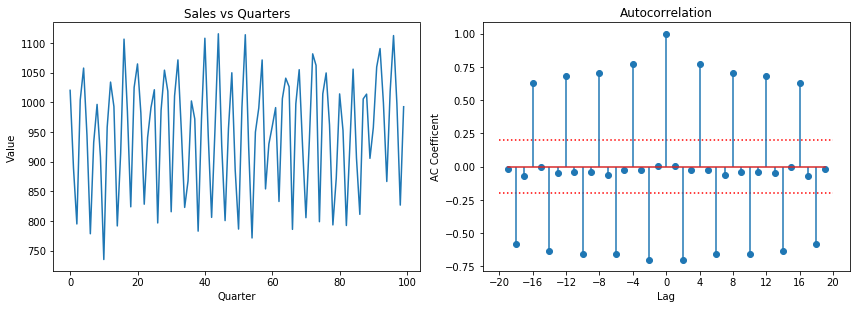

In [76]:
# 5a
# Plot ACF for Sales, and Sales vs Time next to each other
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.title('Sales vs Quarters')
plt.ylabel("Value")
plt.xlabel("Quarter")
plt.plot(df.Sales)

plt.subplot(2, 2, 2)
plt.title('Autocorrelation')
plt.xlabel('Lag')
plt.ylabel('AC Coefficent')
# Incorporate 95% ACF white noise threshold
# +-2/ squareroot of T(100) = 0.2
plt.hlines(0.2,-20,20,"r",linestyles="dotted")
plt.hlines(-0.2,-20,20,"r",linestyles="dotted")
plt.xticks(np.arange(-20, 21, step=4))
plt.stem(xx,s_acf_plt,use_line_collection=True)

#plt.text(-7,1.2,"ADF Test Results = {}".format(x))   
plt.tight_layout()
plt.show()

In [73]:
# 5b
# Plot acf for AdBudget and AdBudget vs Time

adb_acf = auto_corr(df.AdBudget,20)
adf_adb = ADF_Cal(df.AdBudget)

The mean of this dataset is:  591.933
The total variance for this dataset is:  292357.20109999995
ADF Statistic: -2.758605
p-value: 0.064434
Used lags: 7.000000
Critical Values:
	1%: -3.503515
	5%: -2.893508
	10%: -2.583824


In [77]:
adbd_acf_plt = acf_plot(sales_acf)
xx = np.array(list(range(-19,20)))

39


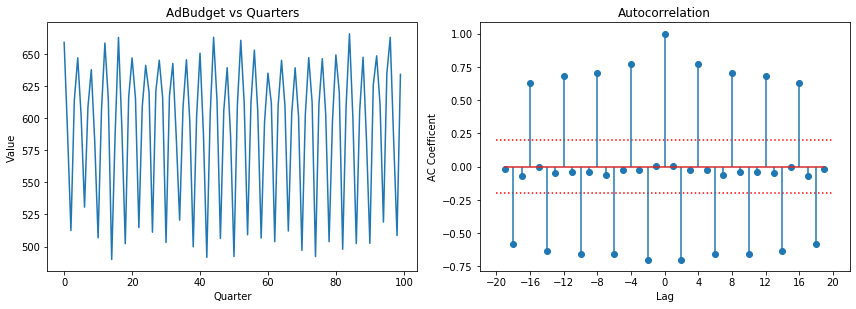

In [78]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.title('AdBudget vs Quarters')
plt.ylabel("Value")
plt.xlabel("Quarter")
plt.plot(df.AdBudget)

plt.subplot(2, 2, 2)
plt.title('Autocorrelation')
plt.xlabel('Lag')
plt.ylabel('AC Coefficent')
# Incorporate 95% ACF white noise threshold
# +-2/ squareroot of T(100) = 0.2
plt.hlines(0.2,-20,20,"r",linestyles="dotted")
plt.hlines(-0.2,-20,20,"r",linestyles="dotted")
plt.xticks(np.arange(-20, 21, step=4))
plt.stem(xx,adbd_acf_plt, use_line_collection=True)

    
plt.tight_layout()
plt.show()

In [79]:
# 5c
# # Plot ACF for GDP , and GDP vs Time next to each other

gdp_acf = auto_corr(df.GDP,20)
adf_gdp = ADF_Cal(df.GDP)

The mean of this dataset is:  281.18300000000005
The total variance for this dataset is:  20444.581100000003
ADF Statistic: -3.227577
p-value: 0.018443
Used lags: 7.000000
Critical Values:
	1%: -3.503515
	5%: -2.893508
	10%: -2.583824


In [80]:
gdp_acf_plt = acf_plot(sales_acf)
xx = np.array(list(range(-19,20)))

39


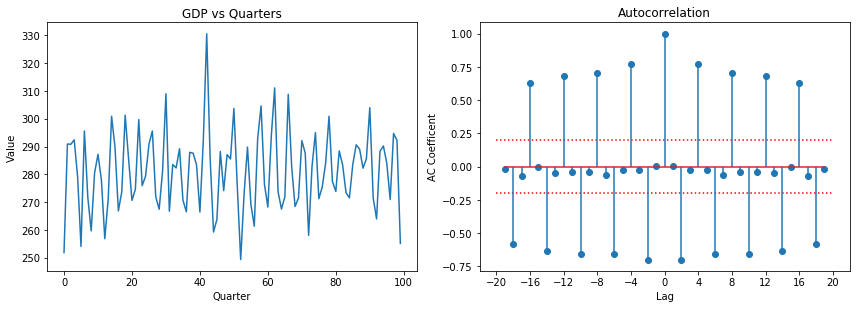

In [83]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.title('GDP vs Quarters')
plt.ylabel("Value")
plt.xlabel("Quarter")
plt.plot(df.GDP)

plt.subplot(2, 2, 2)
plt.title('Autocorrelation')
plt.xlabel('Lag')
plt.ylabel('AC Coefficent')
plt.xticks(np.arange(-20, 21, step=4))
# Incorporate 95% ACF white noise threshold
# +-2/ squareroot of T(100) = 0.2
plt.hlines(0.2,-20,20,"r",linestyles="dotted")
plt.hlines(-0.2,-20,20,"r",linestyles="dotted")
plt.stem(xx,gdp_acf_plt,use_line_collection=True)

    
plt.tight_layout()
plt.show()

In [206]:
# Create a function that calculates the correlation coefficent of x and y variables
def correlation_coefficent_cal(dat1,dat2,x,y):
    # calculate cross_variance between x and y
    # convert list data into numpy arrays
    dat1_mean = np.array(dat1).mean()
    print("mean of " + str(x) +":",dat1_mean)
    dat2_mean = np.array(dat2).mean()
    print("mean of " + str(y) + ":",dat2_mean)
    cross_v = sum((dat1 - dat1_mean)*(dat2-dat2_mean))
    print("Cross variance:", cross_v)
    dat1_sd = np.sqrt(sum(np.square(dat1 - dat1_mean)))
    print("standard devation of " + str(x) + ":",dat1_sd)
    dat2_sd = np.sqrt(sum(np.square(dat2 - dat2_mean)))
    print("standard devation of "+ str(y) + ":",dat2_sd)
    r = cross_v/(dat1_sd * dat2_sd)
    print("The correlation coefficent between " + str(x) + " and " + str(y) + " is:",r)
    return r
    

In [208]:
correlation_coefficent_cal(df.Sales,df.AdBudget,"Sales","GDP")

mean of Sales: 948.737
mean of GDP: 591.933
Cross variance: 479833.3079
standard devation of Sales: 977.596917497186
standard devation of GDP: 540.7006575731159
The correlation coefficent between Sales and GDP is: 0.9077654938192307


0.9077654938192307